<a href="https://colab.research.google.com/github/santhoshbvsrk/Machine-Learning-Projects/blob/main/ImbalanceClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*   When observation in one class is higher than the observation in other classes then there exists a class imbalance.
*   Class Imbalance is a common problem in machine learning, especially in classification problems. Imbalance data can hamper our model accuracy big time.

In [1]:
import pandas as pd
import numpy as np

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

defcon_df = pd.read_csv("https://raw.githubusercontent.com/santhoshbvsrk/DeepLearning/main/DEFCON/defcon_level.csv")
defcon_df.head(3)

,Allied_Nations,Diplomatic_Meetings_Set,Percent_Of_Forces_Mobilized,Hostile_Nations,Active_Threats,Inactive_Threats,Citizen_Fear_Index,Closest_Threat_Distance(km),Aircraft_Carriers_Responding,Troops_Mobilized(thousands),DEFCON_Level,ID
0,16,1,0.67,3,6.0,25.0,0.787812,324.36,1,862400.0,3,7570
1,8,1,0.11,2,38.0,48.0,0.419236,359.34,0,959200.0,4,12128
2,9,1,0.49,3,32.0,69.0,0.582232,332.84,1,836000.0,3,2181


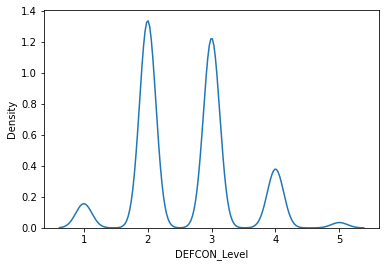

<Figure size 720x720 with 0 Axes>

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(defcon_df.DEFCON_Level)
plt.figure(figsize=(10,10))
plt.show()

### This shows that there is Imbalance in the Target class. Now, let us fix Imbalance in data using various methods.

In [3]:
X=defcon_df.drop(['DEFCON_Level','ID'],axis=1)
y=defcon_df.DEFCON_Level

## 1. SMOTE Technique

In [4]:
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')
smote = SMOTE()

# fit predictor and target variable
X_smote, y_smote = smote.fit_resample(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [5]:
defcon_df.columns

Index(['Allied_Nations', 'Diplomatic_Meetings_Set',
       'Percent_Of_Forces_Mobilized', 'Hostile_Nations', 'Active_Threats',
       'Inactive_Threats', 'Citizen_Fear_Index', 'Closest_Threat_Distance(km)',
       'Aircraft_Carriers_Responding', 'Troops_Mobilized(thousands)',
       'DEFCON_Level', 'ID'],
      dtype='object')

In [6]:
smote_df = pd.DataFrame(X_smote, columns = ['Allied_Nations', 'Diplomatic_Meetings_Set',
       'Percent_Of_Forces_Mobilized', 'Hostile_Nations', 'Active_Threats',
       'Inactive_Threats', 'Citizen_Fear_Index', 'Closest_Threat_Distance(km)',
       'Aircraft_Carriers_Responding', 'Troops_Mobilized(thousands)'])
smote_df.head(3)

,Allied_Nations,Diplomatic_Meetings_Set,Percent_Of_Forces_Mobilized,Hostile_Nations,Active_Threats,Inactive_Threats,Citizen_Fear_Index,Closest_Threat_Distance(km),Aircraft_Carriers_Responding,Troops_Mobilized(thousands)
0,16.0,1.0,0.67,3.0,6.0,25.0,0.787812,324.36,1.0,862400.0
1,8.0,1.0,0.11,2.0,38.0,48.0,0.419236,359.34,0.0,959200.0
2,9.0,1.0,0.49,3.0,32.0,69.0,0.582232,332.84,1.0,836000.0


In [7]:
smote_df['DEFCON_Level'] = y_smote
smote_df.head(3)

,Allied_Nations,Diplomatic_Meetings_Set,Percent_Of_Forces_Mobilized,Hostile_Nations,Active_Threats,Inactive_Threats,Citizen_Fear_Index,Closest_Threat_Distance(km),Aircraft_Carriers_Responding,Troops_Mobilized(thousands),DEFCON_Level
0,16.0,1.0,0.67,3.0,6.0,25.0,0.787812,324.36,1.0,862400.0,3
1,8.0,1.0,0.11,2.0,38.0,48.0,0.419236,359.34,0.0,959200.0,4
2,9.0,1.0,0.49,3.0,32.0,69.0,0.582232,332.84,1.0,836000.0,3


Ignoring ID column as that doesn't add value to our analysis.

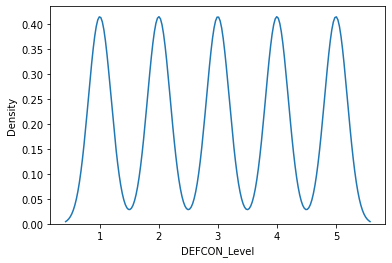

<Figure size 720x720 with 0 Axes>

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(smote_df.DEFCON_Level)
plt.figure(figsize=(10,10))
plt.show()

This shows that data is balanced

In [10]:
smote_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21350 entries, 0 to 21349
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Allied_Nations                21350 non-null  float64
 1   Diplomatic_Meetings_Set       21350 non-null  float64
 2   Percent_Of_Forces_Mobilized   21350 non-null  float64
 3   Hostile_Nations               21350 non-null  float64
 4   Active_Threats                21350 non-null  float64
 5   Inactive_Threats              21350 non-null  float64
 6   Citizen_Fear_Index            21350 non-null  float64
 7   Closest_Threat_Distance(km)   21350 non-null  float64
 8   Aircraft_Carriers_Responding  21350 non-null  float64
 9   Troops_Mobilized(thousands)   21350 non-null  float64
 10  DEFCON_Level                  21350 non-null  int64  
dtypes: float64(10), int64(1)
memory usage: 1.8 MB


## 2. Random Over Sampling Technique with imblearn

In [22]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

print('Before Random Over Sampling:',Counter(y))
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_over, y_over_min = oversample.fit_resample(X, y)
# summarize class distribution
print('Post Random Over Sampling using Strategy as minority where only Minority class is over sampled:',Counter(y_over_min))
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='not minority')
# fit and apply the transform
X_over, y_over_not_min = oversample.fit_resample(X, y)
# summarize class distribution
print('Post Random Over Sampling using Strategy as not minority where all classes are over sampled except Minority:',Counter(y_over_not_min))
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='not majority')
# fit and apply the transform
X_over, y_over_not_maj = oversample.fit_resample(X, y)
# summarize class distribution
print('Post Random Over Sampling using Strategy as not majority where all classes are over sampled except Majority:',Counter(y_over_not_maj))
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='all')
# fit and apply the transform
X_over, y_over_all = oversample.fit_resample(X, y)
# summarize class distribution
print('Post Random Over Sampling using Strategy as all where all classes are over sampled:',Counter(y_over_all))

Before Random Over Sampling: Counter({2: 4270, 3: 3910, 4: 1212, 1: 498, 5: 110})
Post Random Over Sampling using Strategy as minority where only Minority class is over sampled: Counter({2: 4270, 5: 4270, 3: 3910, 4: 1212, 1: 498})
Post Random Over Sampling using Strategy as not minority where all classes are over sampled except Minority: Counter({3: 4270, 4: 4270, 2: 4270, 1: 4270, 5: 110})
Post Random Over Sampling using Strategy as not majority where all classes are over sampled except Majority: Counter({3: 4270, 4: 4270, 2: 4270, 1: 4270, 5: 4270})
Post Random Over Sampling using Strategy as all where all classes are over sampled: Counter({3: 4270, 4: 4270, 2: 4270, 1: 4270, 5: 4270})


In [27]:
RandomOverSampler_df = pd.DataFrame(X_over, columns = ['Allied_Nations', 'Diplomatic_Meetings_Set',
       'Percent_Of_Forces_Mobilized', 'Hostile_Nations', 'Active_Threats',
       'Inactive_Threats', 'Citizen_Fear_Index', 'Closest_Threat_Distance(km)',
       'Aircraft_Carriers_Responding', 'Troops_Mobilized(thousands)'])
RandomOverSampler_df.head(3)

,Allied_Nations,Diplomatic_Meetings_Set,Percent_Of_Forces_Mobilized,Hostile_Nations,Active_Threats,Inactive_Threats,Citizen_Fear_Index,Closest_Threat_Distance(km),Aircraft_Carriers_Responding,Troops_Mobilized(thousands)
0,16.0,1.0,0.67,3.0,6.0,25.0,0.787812,324.36,1.0,862400.0
1,8.0,1.0,0.11,2.0,38.0,48.0,0.419236,359.34,0.0,959200.0
2,9.0,1.0,0.49,3.0,32.0,69.0,0.582232,332.84,1.0,836000.0


In [28]:
RandomOverSampler_df['DEFCON_Level'] = y_over_all
RandomOverSampler_df.head(3)

,Allied_Nations,Diplomatic_Meetings_Set,Percent_Of_Forces_Mobilized,Hostile_Nations,Active_Threats,Inactive_Threats,Citizen_Fear_Index,Closest_Threat_Distance(km),Aircraft_Carriers_Responding,Troops_Mobilized(thousands),DEFCON_Level
0,16.0,1.0,0.67,3.0,6.0,25.0,0.787812,324.36,1.0,862400.0,3
1,8.0,1.0,0.11,2.0,38.0,48.0,0.419236,359.34,0.0,959200.0,4
2,9.0,1.0,0.49,3.0,32.0,69.0,0.582232,332.84,1.0,836000.0,3


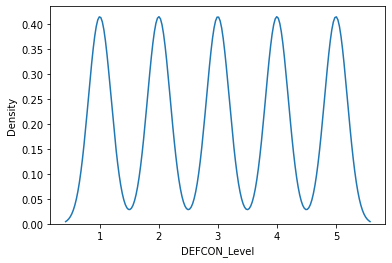

<Figure size 720x720 with 0 Axes>

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(RandomOverSampler_df.DEFCON_Level)
plt.figure(figsize=(10,10))
plt.show()

All the Target Classes are balanced.

In [30]:
RandomOverSampler_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21350 entries, 0 to 21349
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Allied_Nations                21350 non-null  float64
 1   Diplomatic_Meetings_Set       21350 non-null  float64
 2   Percent_Of_Forces_Mobilized   21350 non-null  float64
 3   Hostile_Nations               21350 non-null  float64
 4   Active_Threats                21350 non-null  float64
 5   Inactive_Threats              21350 non-null  float64
 6   Citizen_Fear_Index            21350 non-null  float64
 7   Closest_Threat_Distance(km)   21350 non-null  float64
 8   Aircraft_Carriers_Responding  21350 non-null  float64
 9   Troops_Mobilized(thousands)   21350 non-null  float64
 10  DEFCON_Level                  21350 non-null  int64  
dtypes: float64(10), int64(1)
memory usage: 1.8 MB


## 3. Random Under Sampling with imblearn

In [31]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

print('Before Random Under Sampling:',Counter(y))
# define UnderSampling strategy
undersample = RandomUnderSampler(sampling_strategy='majority')
# fit and apply the transform
X_under, y_under_min = undersample.fit_resample(X, y)
# summarize class distribution
print('Post Random Under Sampling using Strategy as majority where only Majority class is under sampled:',Counter(y_under_min))
# define UnderSampling strategy
undersample = RandomUnderSampler(sampling_strategy='not minority')
# fit and apply the transform
X_under, y_under_not_min = undersample.fit_resample(X, y)
# summarize class distribution
print('Post Random Under Sampling using Strategy as not minority where all classes are under sampled except Minority:',Counter(y_under_not_min))
# define UnderSampling strategy
undersample = RandomUnderSampler(sampling_strategy='not majority')
# fit and apply the transform
X_under, y_under_not_maj = undersample.fit_resample(X, y)
# summarize class distribution
print('Post Random Under Sampling using Strategy as not majority where all classes are under sampled except Majority:',Counter(y_under_not_maj))
# define UnderSampling strategy
undersample = RandomUnderSampler(sampling_strategy='all')
# fit and apply the transform
X_under, y_under_all = undersample.fit_resample(X, y)
# summarize class distribution
print('Post Random Under Sampling using Strategy as all where all classes are under sampled:',Counter(y_under_all))

Before Random Under Sampling: Counter({2: 4270, 3: 3910, 4: 1212, 1: 498, 5: 110})
Post Random Under Sampling using Strategy as majority where only Majority class is under sampled: Counter({3: 3910, 4: 1212, 1: 498, 2: 110, 5: 110})
Post Random Under Sampling using Strategy as not minority where all classes are under sampled except Minority: Counter({1: 110, 2: 110, 3: 110, 4: 110, 5: 110})
Post Random Under Sampling using Strategy as not majority where all classes are under sampled except Majority: Counter({2: 4270, 1: 110, 3: 110, 4: 110, 5: 110})
Post Random Under Sampling using Strategy as all where all classes are under sampled: Counter({1: 110, 2: 110, 3: 110, 4: 110, 5: 110})


In [32]:
RandomUnderSampler_df = pd.DataFrame(X_under, columns = ['Allied_Nations', 'Diplomatic_Meetings_Set',
       'Percent_Of_Forces_Mobilized', 'Hostile_Nations', 'Active_Threats',
       'Inactive_Threats', 'Citizen_Fear_Index', 'Closest_Threat_Distance(km)',
       'Aircraft_Carriers_Responding', 'Troops_Mobilized(thousands)'])
RandomUnderSampler_df.head(3)

,Allied_Nations,Diplomatic_Meetings_Set,Percent_Of_Forces_Mobilized,Hostile_Nations,Active_Threats,Inactive_Threats,Citizen_Fear_Index,Closest_Threat_Distance(km),Aircraft_Carriers_Responding,Troops_Mobilized(thousands)
0,8.0,0.0,0.10,2.0,6.0,16.0,0.435389,347.68,1.0,906400.0
1,7.0,1.0,0.00,2.0,12.0,38.0,0.491189,357.22,0.0,800800.0
2,7.0,1.0,0.03,2.0,7.0,12.0,0.450073,368.88,0.0,897600.0


In [33]:
RandomUnderSampler_df['DEFCON_Level'] = y_under_all
RandomUnderSampler_df.head(3)

,Allied_Nations,Diplomatic_Meetings_Set,Percent_Of_Forces_Mobilized,Hostile_Nations,Active_Threats,Inactive_Threats,Citizen_Fear_Index,Closest_Threat_Distance(km),Aircraft_Carriers_Responding,Troops_Mobilized(thousands),DEFCON_Level
0,8.0,0.0,0.10,2.0,6.0,16.0,0.435389,347.68,1.0,906400.0,1
1,7.0,1.0,0.00,2.0,12.0,38.0,0.491189,357.22,0.0,800800.0,1
2,7.0,1.0,0.03,2.0,7.0,12.0,0.450073,368.88,0.0,897600.0,1


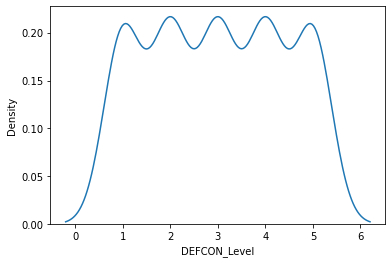

<Figure size 720x720 with 0 Axes>

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(RandomUnderSampler_df.DEFCON_Level)
plt.figure(figsize=(10,10))
plt.show()

This shows all classes in the data are balanced but with data loss

In [34]:
RandomUnderSampler_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Allied_Nations                550 non-null    float64
 1   Diplomatic_Meetings_Set       550 non-null    float64
 2   Percent_Of_Forces_Mobilized   550 non-null    float64
 3   Hostile_Nations               550 non-null    float64
 4   Active_Threats                550 non-null    float64
 5   Inactive_Threats              550 non-null    float64
 6   Citizen_Fear_Index            550 non-null    float64
 7   Closest_Threat_Distance(km)   550 non-null    float64
 8   Aircraft_Carriers_Responding  550 non-null    float64
 9   Troops_Mobilized(thousands)   550 non-null    float64
 10  DEFCON_Level                  550 non-null    int64  
dtypes: float64(10), int64(1)
memory usage: 47.4 KB
